## **MINI Project**

### Installing required Libraries

In [10]:
%pip install pandas numpy scikit-learn xgboost matplotlib seaborn imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Importing Libraries**

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Load datasets
df1 = pd.read_csv('water_potability.csv')  
df2 = pd.read_csv('train_dataset.csv')


#### Combining both datasets into one dataframe

In [12]:
df = pd.concat([df1,df2],ignore_index= True)

#### Deleting the duplicated rows

In [13]:
df.drop_duplicates() # there is more 1000 duplicated row

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
5559,7.080795,166.404968,14202.193805,9.006796,370.538524,493.440244,12.453160,59.804167,2.848371,1
5561,6.150034,188.413055,8406.723244,7.744714,358.591738,449.358812,13.220295,52.956632,3.444442,1
5562,7.080795,165.892970,11566.875548,8.326155,333.775777,369.289777,7.401868,66.686950,3.603090,1
5563,7.080795,207.391097,25110.037626,6.329791,345.592634,420.219104,22.346415,92.327760,2.739235,0


*Both datasets have been concatenated and duplicate rows have been deleted*

## **Handling Missing Values**

In [14]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())


*All missing Values have been filled with suitable central values*

### **Splitting Data**

In [15]:
from imblearn.over_sampling import BorderlineSMOTE
# Split the data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

smote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Borderline-SMOTE: Improves classification performance by addressing the most difficult minority class samples near the boundary.*

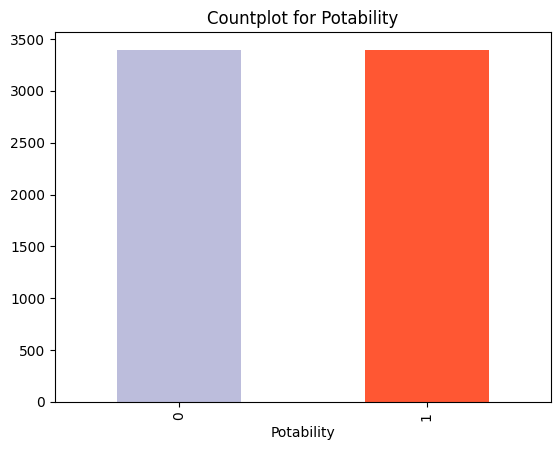

In [16]:
y_smote.value_counts().plot(kind = 'bar', color = ["#bcbddc", "#FF5733"])
plt.title("Countplot for Potability")
plt.show()

*All data points near the borderline have been given synthetic values*

# **TRAINING Random Forest Model**

In [17]:
# Define the RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,max_depth=None,min_samples_leaf=2,min_samples_split=2,n_estimators=200
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate metrics
rf_accuracy = round(accuracy_score(y_test, y_pred), 3)
rf_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
rf_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
rf_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Printing classification results
print("Random Forest Classification Results with Best Hyperparameters:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

# Storing results in a dict
rf_results = {
    'Model': 'Random Forest with Best Hyperparameters',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Best Hyperparameters': {
        'bootstrap': True,
        'max_depth': None,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 200
    }
}



Random Forest Classification Results with Best Hyperparameters:
Accuracy: 0.885
Precision: 0.888
Recall: 0.885
F1-Score: 0.883


# **Result analysis**

C:\Users\kaust\AppData\Local\Temp\ipykernel_19160\1693916952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Blues_d')


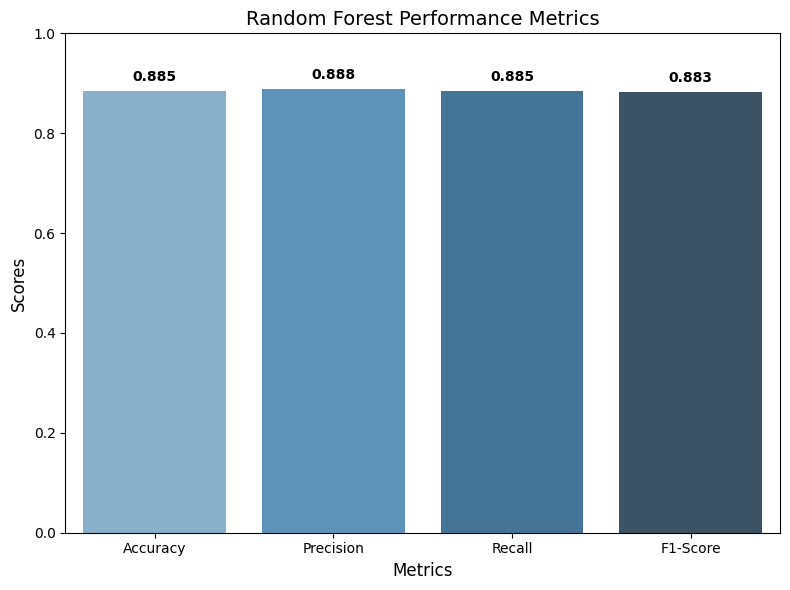

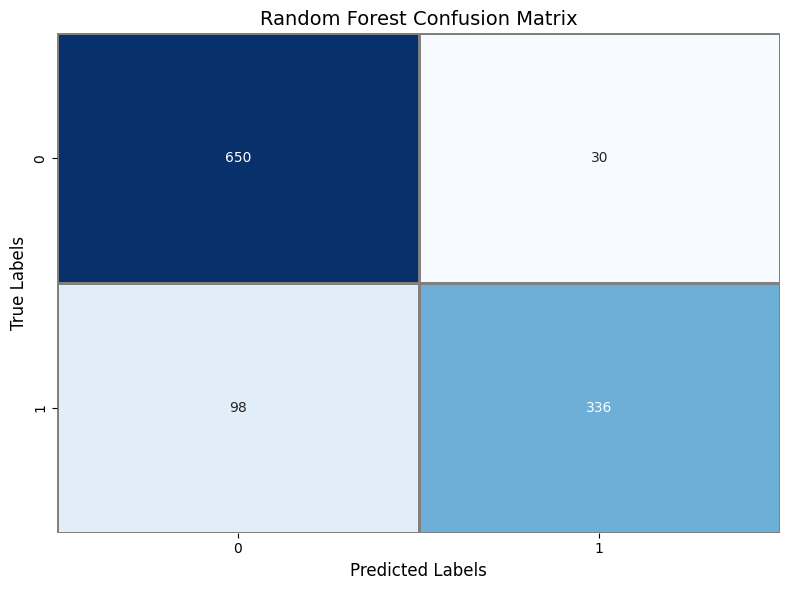

In [18]:
# Bar plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues_d')
plt.title('Random Forest Performance Metrics', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.ylim(0, 1)  # Set y-axis to be between 0 and 1
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=1, linecolor="gray", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()


- *Random Forest, Stacking Classifier and XGboost are the best models here*
- *We can try to refine Random Forest and XGboost Models more*

### **Testing some individual Values**

In [19]:
# prediction
print(rf.predict([X_test.iloc[0]]))
print(rf.predict([X_test.iloc[20]]))

[0]
[1]


c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
print(X_test.iloc[0])

ph                     7.566517
Hardness             205.396582
Solids             30823.730490
Chloramines            7.816636
Sulfate              354.175972
Conductivity         395.297275
Organic_carbon        12.095251
Trihalomethanes       63.767702
Turbidity              3.275142
Name: 1722, dtype: float64


### **Pickling for Deployment**

In [21]:
import pickle

In [22]:
# Save the trained RandomForest model to a .pkl file
pickle.dump(rf, open('classifyModel.pkl', 'wb'))


Loading the pkl file

In [23]:
pickled_model = pickle.load(open('classifyModel.pkl','rb'))

In [24]:
print(pickled_model.predict([X_test.iloc[0]]))

[0]


c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
